# First NN training and test 

##### use a keras implemention of the neural network 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os

import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation
from keras.activations import elu
from keras.constraints import maxnorm
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from keras.utils.vis_utils import plot_model

Using TensorFlow backend.


In [13]:
# Definition of the path of the data
data_path = 'C:\\Users\\pierr\\Desktop\\Projet de semestre I\\Semester_project\\data_test.csv'

In [14]:
# load the data 
data = np.loadtxt(data_path, delimiter=',')
ind = data[:,0]
data= data[:,1:]

In [56]:
#modifie the negative value 
# select all that have a negative radius
def modifie_negative_angle( data ):
    indice_neg = np.where(data[:,-1]<0)[0]
    data[indice_neg,-1] += np.pi 
    return indice_neg

In [ ]:
indice_neg_data = modifie_negative_angle(data)

In [16]:
def data_split(data, ratio_train=0.8):
    num_observation = np.shape(data)[0]
    size_train = int(num_observation*ratio_train)
    random_permuted_indices = np.random.permutation(num_observation)
    data_suffle = data[random_permuted_indices]
    X_train = data_suffle[:size_train,:-1]
    X_test = data_suffle[size_train:,:-1]
    Y_train = np.reshape(data_suffle[:size_train,-1],(size_train,1))
    Y_test = np.reshape(data_suffle[size_train:,-1],(num_observation-size_train,1))
    return X_train , X_test , Y_train , Y_test

In [17]:
X_train, X_test, Y_train, Y_test = data_split(data)

In [18]:
# check the size of the training and test set :
print(" the size of X_train is ",np.shape(X_train))
print(" the size of X_test is ",np.shape(X_test))
print(" the size of Y_train is ",np.shape(Y_train))
print(" the size of Y_test is ",np.shape(Y_test))


 the size of X_train is  (9832, 10)
 the size of X_test is  (2458, 10)
 the size of Y_train is  (9832, 1)
 the size of Y_test is  (2458, 1)


In [19]:
def model_training(model,X_train,X_test,Y_train,Y_test, patience_ = 50 , plot=True ):
    """Train the different models and return the MSE values"""
    early_stop = EarlyStopping(monitor ="val_loss", patience = patience_ , verbose = 1)
    history = model.fit(X_train, Y_train, validation_split=0.2, epochs=2000 ,callbacks=[early_stop] , verbose=0)
    train_mse = model.evaluate(X_train, Y_train, verbose=0)
    test_mse = model.evaluate(X_test, Y_test, verbose=0)
    print('MSE Train: %.3f | MSE Test: %.3f' % (train_mse, test_mse))
    if plot :
        # plot loss during training
        plt.title('Loss / Mean Squared Error')
        plt.plot(history.history['loss'], label='train')
        plt.plot(history.history['val_loss'], label='test')
        plt.legend()
        plt.show()
    return train_mse,test_mse

In [20]:
def angle_visualization(model , X_test ,Y_test, nbr_of_plot = 10):
    x = np.linspace(-1,1,1001)
    Y_hat =  model.predict(X_test, verbose=0)
    coeff_true = np.tan(Y_test)
    coeff_hat = np.tan(Y_hat)
    pts = np.array([[-1,-1],[-1,1],[1,-1]])
    for i in range(nbr_of_plot):
        plt.figure()
        triangle = plt.Polygon(pts,fill=False)
        plt.gca().add_patch(triangle)
        plt.arrow(-0.5,0,np.cos(Y_test[i,0]),np.sin(Y_test[i,0]),head_width=0.05, head_length=0.1,color='r', label =' true ')
        plt.arrow(-0.5,0,np.cos(Y_hat[i,0]),np.sin(Y_hat[i,0]),head_width=0.05, head_length=0.1,color='b', label = 'prediction')
        plt.xlim(-1.5,1.7)
        plt.ylim(-1.5,1.5)
        plt.title(" Angle visualization red is true ")
        plt.show()

    
    

### NN base line : (Hidden layer: 0 , Nodes: (10,1) )

In [21]:
def build_model_base_line(summary = True):
    
    #architecture
    model = Sequential()
    model.add(Dense(1 ,input_shape=(10,)))
    if summary :
        print(model.summary())
    
    #optimiser 
    model.compile(loss='mean_squared_error',optimizer='adam')
    return model

In [22]:
model_base = build_model_base_line()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 11        
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________
None


Epoch 00106: early stopping
MSE Train: 0.735 | MSE Test: 0.710


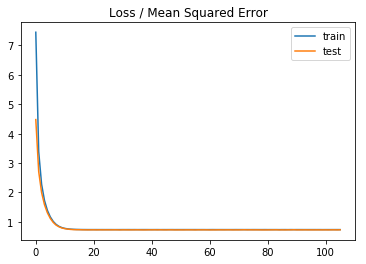

(0.735216257094949, 0.7096583638082586)

In [23]:
patience_ = 50
model_training(model_base,X_train, X_test , Y_train, Y_test, patience_ )

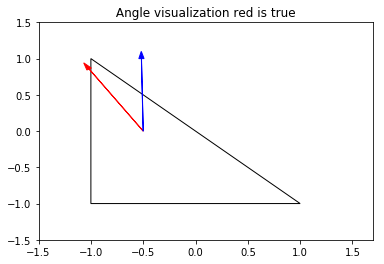

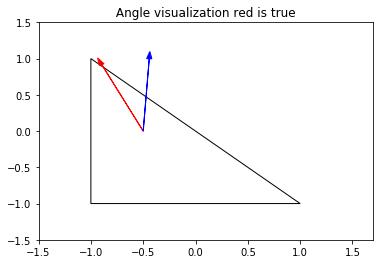

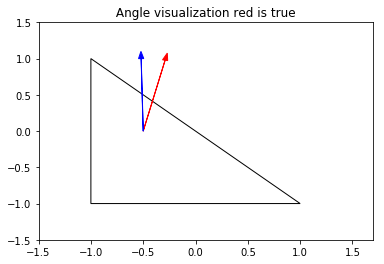

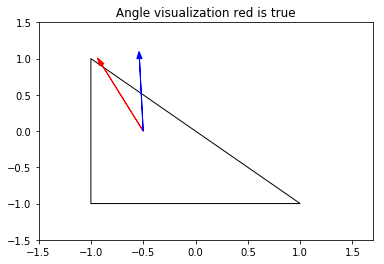

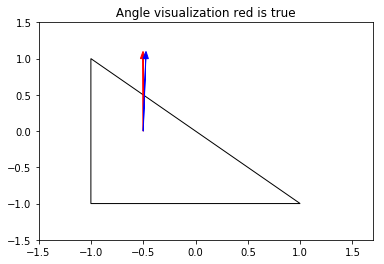

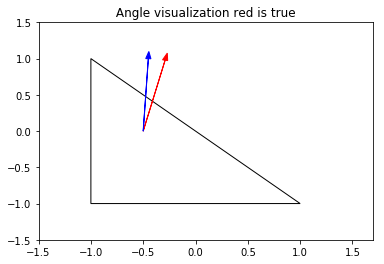

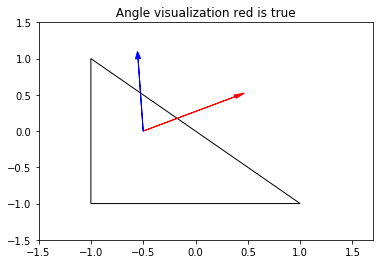

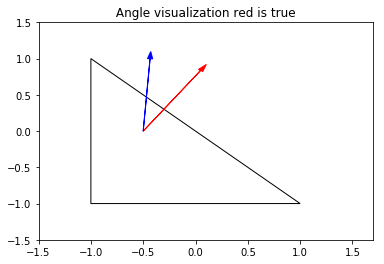

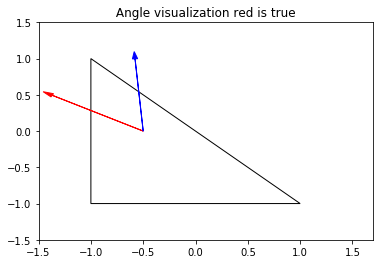

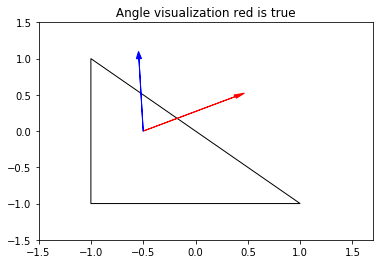

In [24]:
angle_visualization(model_base , X_test , Y_test)

### Model 1 : (Hidden layer: 1 , Nodes: (10,10,1) )

In [28]:
def build_model_1(summary = True):
    
    #architecture
    model = Sequential()
    model.add(Dense(12 ,input_shape=(10,)))
    model.add(Dense(1))
    if summary:
        print(model.summary())
    
    #optimiser 
    model.compile(loss='mean_squared_error',optimizer='adam')
    return model

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 12)                132       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 13        
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________
None
Epoch 00350: early stopping
MSE Train: 0.736 | MSE Test: 0.710


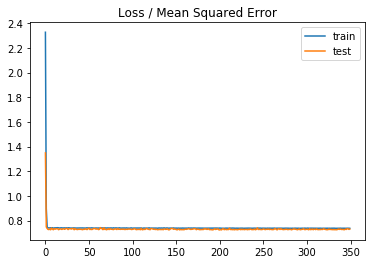

(0.7357700867707211, 0.7103722849156043)

In [29]:
model_1 = build_model_1()
patience_ = 150
model_training(model_1,X_train, X_test , Y_train, Y_test, patience_ )

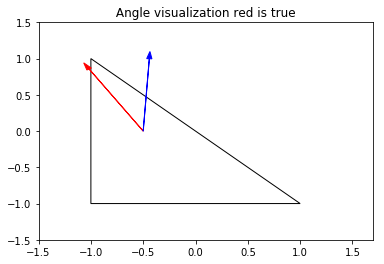

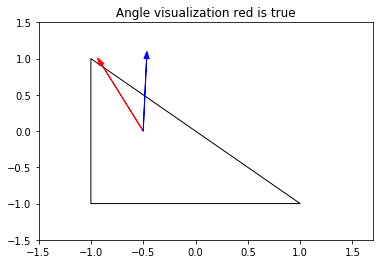

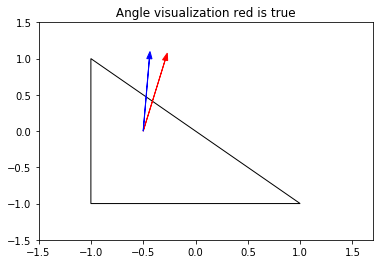

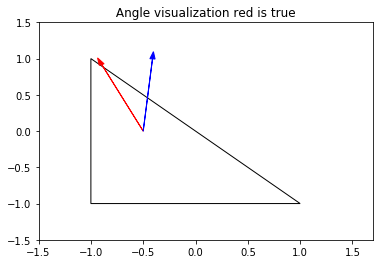

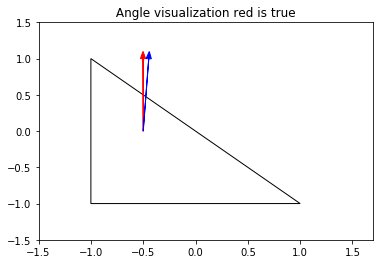

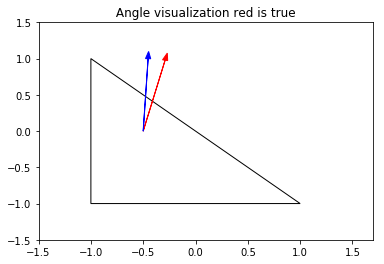

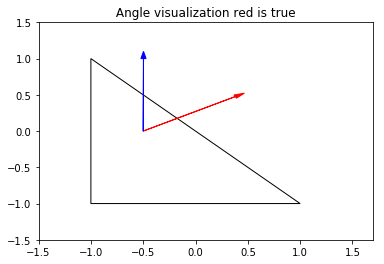

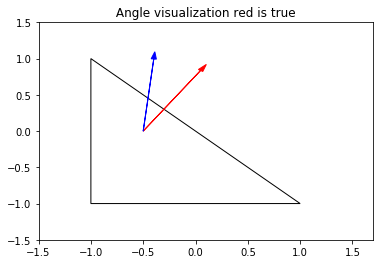

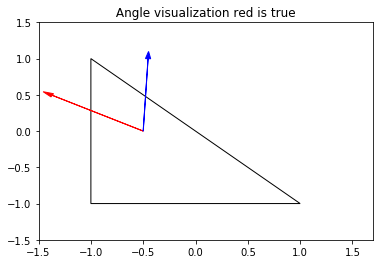

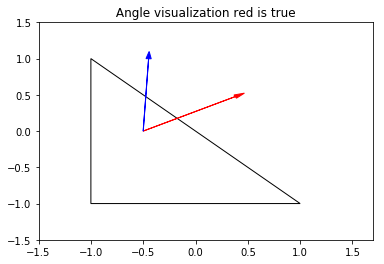

In [30]:
angle_visualization(model_1 , X_test , Y_test)

### Model 2 : (Hidden layer: 2 , Nodes: (10,12,12,1) )

In [31]:
def build_model_2(summary = True):
    
    #architecture
    model = Sequential()
    model.add(Dense(12 ,input_shape=(10,)))
    model.add(Dense(12))
    model.add(Dense(1))
    if summary:
        print(model.summary())
    
    #optimiser 
    model.compile(loss='mean_squared_error',optimizer='adam')
    return model

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 12)                132       
_________________________________________________________________
dense_8 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_9 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 13        
Total params: 457
Trainable params: 457
Non-trainable params: 0
_________________________________________________________________
None
Epoch 00189: early stopping
MSE Train: 0.734 | MSE Test: 0.708


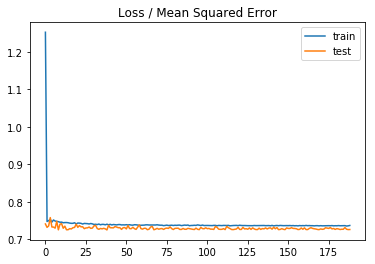

(0.7340168555739258, 0.7080419066478024)

In [32]:
model_2 = build_model_2()
patience_ = 150
model_training(model_2,X_train, X_test , Y_train, Y_test, patience_ )

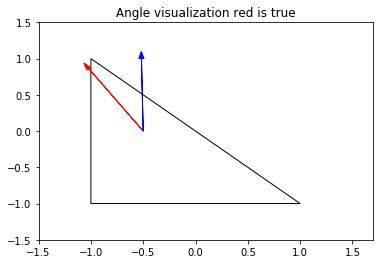

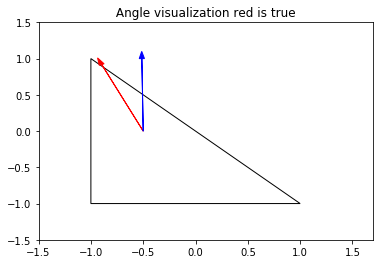

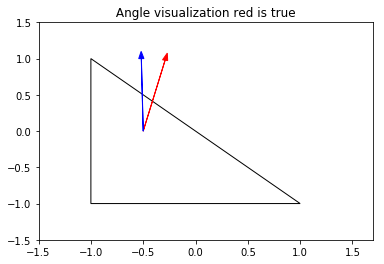

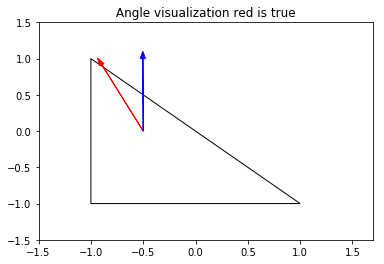

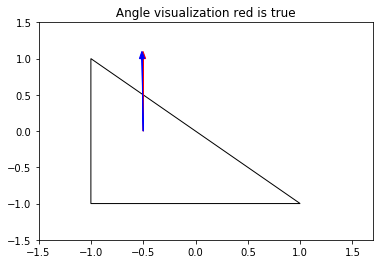

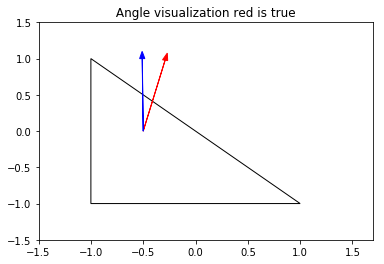

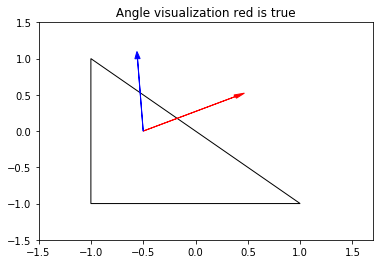

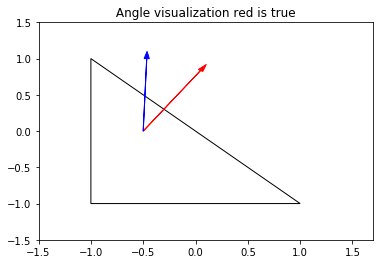

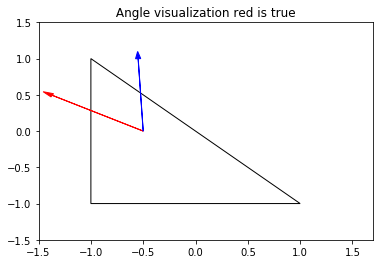

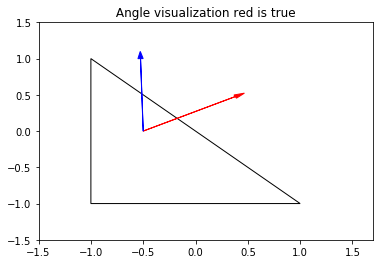

In [33]:
angle_visualization(model_2 , X_test , Y_test)

### Model 2 : (Hidden layer: 2 , Nodes: (10,12,12,1), activation : sigmoid )

In [38]:
def build_model_2_sigmoid(summary = True ):
    #architecture
    model = Sequential()
    model.add(Dense(12 ,input_shape=(10,),activation = 'sigmoid'))
    model.add(Dense(12,activation = 'sigmoid'))
    model.add(Dense(1))
    if summary:
        print(model.summary())
    
    #optimiser 
    model.compile(loss='mean_squared_error',optimizer='adam')
    return model

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 12)                132       
_________________________________________________________________
dense_16 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 13        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________
None
Epoch 00844: early stopping
MSE Train: 0.327 | MSE Test: 0.351


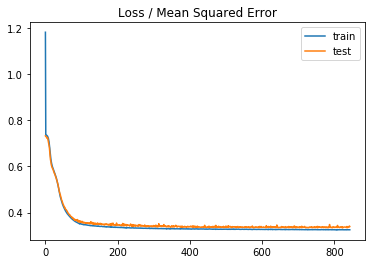

(0.32732350483500344, 0.35137456873745526)

In [39]:
model_2_sigmoid = build_model_2_sigmoid()
patience_ = 150
model_training(model_2_sigmoid,X_train, X_test , Y_train, Y_test, patience_ )

### Model 2 : (Hidden layer: 2 , Nodes: (10,12,12,1), activation : tanh )

In [40]:
def build_model_2_tanh(summary = True ):
    #architecture
    model = Sequential()
    model.add(Dense(12 ,input_shape=(10,),activation = 'tanh'))
    model.add(Dense(12,activation = 'tanh'))
    model.add(Dense(1))
    if summary:
        print(model.summary())
    
    #optimiser 
    model.compile(loss='mean_squared_error',optimizer='adam')
    return model

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 12)                132       
_________________________________________________________________
dense_19 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 13        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________
None
Epoch 00325: early stopping
MSE Train: 0.326 | MSE Test: 0.351


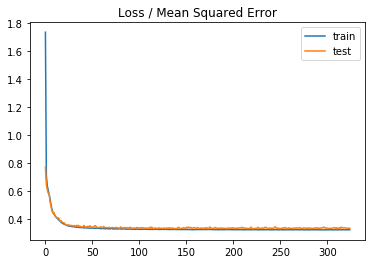

(0.32629355996168175, 0.3512100043143559)

In [41]:
model_2_tanh = build_model_2_tanh()
patience_ = 150
model_training(model_2_tanh,X_train, X_test , Y_train, Y_test, patience_ )

### Model 2 : (Hidden layer: 2 , Nodes: (10,12,12,1), activation : relu )

In [42]:
def build_model_2_relu(summary = True ):
    #architecture
    model = Sequential()
    model.add(Dense(12 ,input_shape=(10,),activation = 'relu'))
    model.add(Dense(12,activation = 'relu'))
    model.add(Dense(1))
    if summary:
        print(model.summary())
    
    #optimiser 
    model.compile(loss='mean_squared_error',optimizer='adam')
    return model

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 12)                132       
_________________________________________________________________
dense_25 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 13        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________
None
Epoch 00434: early stopping
MSE Train: 0.328 | MSE Test: 0.353


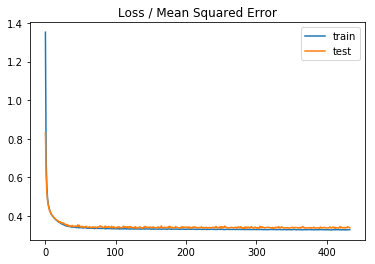

(0.32819464679070853, 0.353045267603861)

In [44]:
model_2_relu = build_model_2_relu()
patience_ = 150
model_training(model_2_relu,X_train, X_test , Y_train, Y_test, patience_ )

### Model 3 : (Hidden layer: 3 , Nodes: (10,12,12,12,1) )

In [45]:
def build_model_3(summary = True):
    
    #architecture
    model = Sequential()
    model.add(Dense(12 ,input_shape=(10,)))
    model.add(Dense(12))
    model.add(Dense(12))
    model.add(Dense(1))
    if summary:
        print(model.summary())
    
    #optimiser 
    model.compile(loss='mean_squared_error',optimizer='adam')
    return model

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 12)                132       
_________________________________________________________________
dense_28 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_29 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 13        
Total params: 457
Trainable params: 457
Non-trainable params: 0
_________________________________________________________________
None
Epoch 00187: early stopping
MSE Train: 0.737 | MSE Test: 0.712


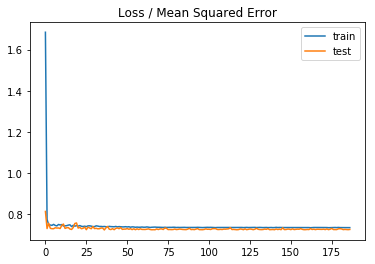

(0.737345255129312, 0.7116045560460443)

In [46]:
model_3 = build_model_3()
patience_ = 150
model_training(model_3,X_train, X_test , Y_train, Y_test, patience_ )

### Model 3 : (Hidden layer: 3 , Nodes: (10,12,12,12,1) , activation : sigmoid )

In [47]:
def build_model_3_sigmoid(summary = True):
    
    #architecture
    model = Sequential()
    model.add(Dense(12 ,input_shape=(10,),activation = 'sigmoid'))
    model.add(Dense(12,activation = 'sigmoid'))
    model.add(Dense(12,activation = 'sigmoid'))
    model.add(Dense(1))
    if summary:
        print(model.summary())
    
    #optimiser 
    model.compile(loss='mean_squared_error',optimizer='adam')
    return model

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 12)                132       
_________________________________________________________________
dense_36 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_37 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 13        
Total params: 457
Trainable params: 457
Non-trainable params: 0
_________________________________________________________________
None
Epoch 00380: early stopping
MSE Train: 0.331 | MSE Test: 0.352


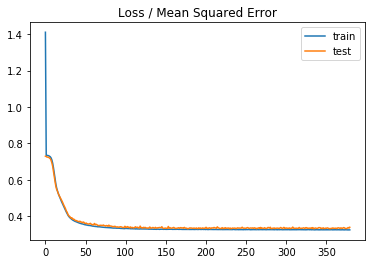

(0.33094072739606567, 0.35214857700105795)

In [49]:
model_3_sigmoid = build_model_3_sigmoid()
patience_ = 150
model_training(model_3_sigmoid,X_train, X_test , Y_train, Y_test, patience_ )

### Model 3 : (Hidden layer: 3 , Nodes: (10,12,12,12,1) , activation : tanh)

In [52]:
def build_model_3_tanh(summary = True):
    
    #architecture
    model = Sequential()
    model.add(Dense(12 ,input_shape=(10,),activation = 'tanh'))
    model.add(Dense(12,activation = 'tanh'))
    model.add(Dense(12,activation = 'tanh'))
    model.add(Dense(1))
    if summary:
        print(model.summary())
    
    #optimiser 
    model.compile(loss='mean_squared_error',optimizer='adam')
    return model

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 12)                132       
_________________________________________________________________
dense_44 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_45 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_46 (Dense)             (None, 1)                 13        
Total params: 457
Trainable params: 457
Non-trainable params: 0
_________________________________________________________________
None
Epoch 00223: early stopping
MSE Train: 0.325 | MSE Test: 0.348


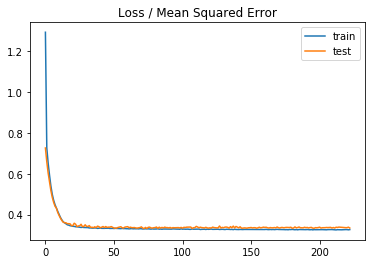

(0.325117719025511, 0.3481518446768659)

In [53]:
model_3_tanh = build_model_3_tanh()
patience_ = 150
model_training(model_3_tanh,X_train, X_test , Y_train, Y_test, patience_ )

### Model 3 : (Hidden layer: 3 , Nodes: (10,12,12,12,1) , activation : relu )

In [50]:
def build_model_3_relu(summary = True):
    
    #architecture
    model = Sequential()
    model.add(Dense(12 ,input_shape=(10,),activation = 'relu'))
    model.add(Dense(12,activation = 'relu'))
    model.add(Dense(12,activation = 'relu'))
    model.add(Dense(1))
    if summary:
        print(model.summary())
    
    #optimiser 
    model.compile(loss='mean_squared_error',optimizer='adam')
    return model

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 12)                132       
_________________________________________________________________
dense_40 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_41 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 13        
Total params: 457
Trainable params: 457
Non-trainable params: 0
_________________________________________________________________
None
Epoch 00380: early stopping
MSE Train: 0.326 | MSE Test: 0.353


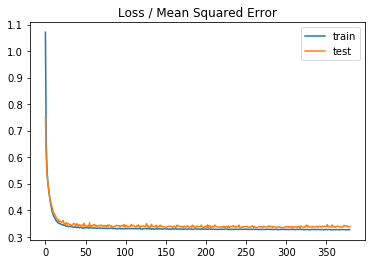

(0.32597272192030247, 0.35283988326230215)

In [51]:
model_3_relu = build_model_3_relu()
patience_ = 150
model_training(model_3_relu,X_train, X_test , Y_train, Y_test, patience_ )

## Conclusion :

###### Without activation function :

model 1 is at 0.7 
model 2 is at 0.7
model 3 is at 0.7 
so increasing the number of layer doesn't show better results 

###### With activation function :
It's seems that for every activation function the mse doesn't vary that much ( maybe try to standardize the value " vanishing effect"). However we can see that the tanh activation function converge 2 time faster than a sigmoid . the relu is also not to bad 

# Making Prediction 

In [77]:
data_path_1 = 'C:\\Users\\pierr\\Desktop\\Projet de semestre I\\Semester_project\\data_test_set_1.csv'
data_path_2 = 'C:\\Users\\pierr\\Desktop\\Projet de semestre I\\Semester_project\\data_test_set_2.csv'

In [78]:
data_test_1 = np.loadtxt(data_path_1, delimiter=',')
data_test_2 = np.loadtxt(data_path_2, delimiter=',')

In [79]:
indice_neg_test_1 = modifie_negative_angle(data_test_1)
indice_neg_tesy_2 = modifie_negative_angle(data_test_2)

In [80]:
X_test_1 = data_test_1[:,1:-1]
X_test_2 = data_test_2[:,1:-1]
print(X_test_1.shape)

(47, 10)


In [81]:
Y_test_1 =  model_3_tanh.predict(X_test_1, verbose=0)
Y_test_2 =  model_3_tanh.predict(X_test_2, verbose=0)

In [82]:
np.savetxt('prediction_data_test_set_1.csv',Y_test_1,delimiter=',')
np.savetxt('prediction_data_test_set_2.csv',Y_test_2,delimiter=',')

array([], dtype=int64)

array([], dtype=int64)